<a href="https://colab.research.google.com/github/tsholofelo-mokheleli/SACAIR-Conference-Proceedings-2023/blob/main/Experiments_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Libraries**

In [267]:
# Load the libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Warning filter
import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

# Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Imputation
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# Load the libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import psutil
import os

# Warning filter
import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from imblearn.metrics import geometric_mean_score

# Classifiers
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Boosting Classifiers
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Hyper-parameter tuning
from sklearn.model_selection import GridSearchCV

# Cross Validation
from sklearn.model_selection import cross_val_score, KFold

# Ensemble Method
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Plot Theme
sns.set_style("darkgrid")
plt.style.use("seaborn-deep")

### **Load Data**

In [268]:
data = pd.read_csv("Clean Mental Health.csv")

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             3269 non-null   int64  
 1   no_employees              2723 non-null   float64
 2   tech_company              2723 non-null   float64
 3   company_role              1840 non-null   float64
 4   benefits                  2723 non-null   float64
 5   care_options              2427 non-null   float64
 6   wellness_program          2723 non-null   float64
 7   seek_help                 2723 non-null   float64
 8   anonymity                 2723 non-null   float64
 9   leave                     2723 non-null   float64
 10  mental_importance         2723 non-null   float64
 11  neg_consequence_coworker  2980 non-null   float64
 12  discuss_mh                1859 non-null   float64
 13  work_interfere            546 non-null    float64
 14  coworker

In [270]:
#Get the numbers of missing values in each column
missing = data.isnull().sum()

#Get the percentage of missing values in each column
missing_pct = round(data.isnull().sum()/len(data) * 100, 1)

orig_data_missing = pd.concat([missing, missing_pct], axis=1)
orig_data_missing.columns = ["Num", "%"]
print(orig_data_missing)

                           Num     %
self_employed                0   0.0
no_employees               546  16.7
tech_company               546  16.7
company_role              1429  43.7
benefits                   546  16.7
care_options               842  25.8
wellness_program           546  16.7
seek_help                  546  16.7
anonymity                  546  16.7
leave                      546  16.7
mental_importance          546  16.7
neg_consequence_coworker   289   8.8
discuss_mh                1410  43.1
work_interfere            2723  83.3
coworkers                  428  13.1
supervisor                 428  13.1
mental_health_interview      0   0.0
family_history               0   0.0
past_mental_health          23   0.7
mental_health                0   0.0
mental_health_diagnosed   1080  33.0
treatment                    0   0.0
age                         10   0.3
gender                       0   0.0
country                      0   0.0


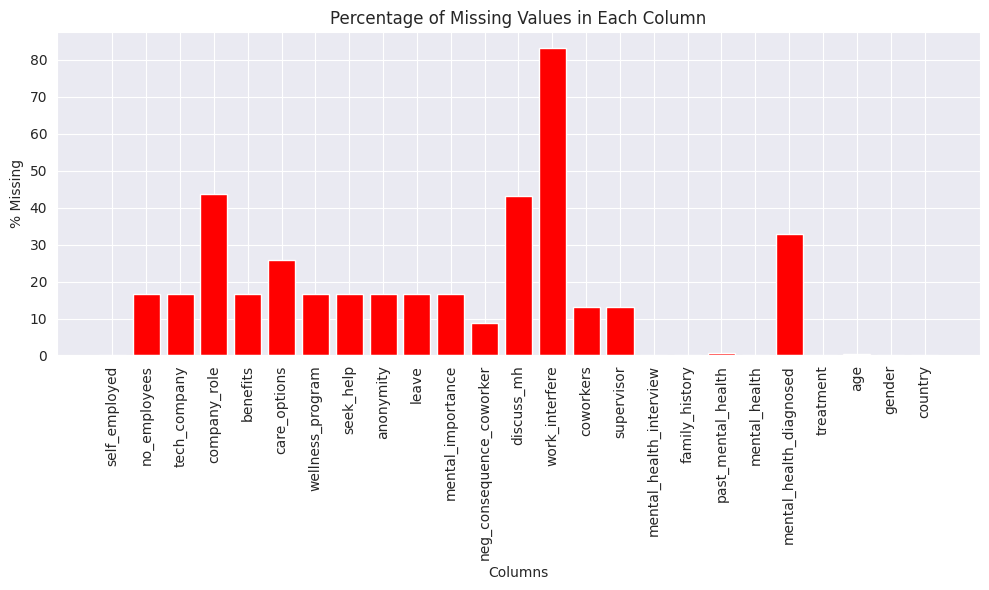

In [271]:
# Create a bar plot to visualize the missing values
plt.figure(figsize=(10, 6))
plt.bar(orig_data_missing.index, orig_data_missing["%"], color='red')
plt.xlabel("Columns")
plt.ylabel("% Missing")
plt.title("Percentage of Missing Values in Each Column")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

### **Data Imputation**

#### **Mode Imputation**

In [272]:
data = pd.read_csv("Clean Mental Health.csv")

In [273]:
columns_to_impute = data.columns[data.columns != "mental_health_diagnosed"]

# Iterate through columns to impute missing values with mode
for column in columns_to_impute:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             2189 non-null   int64  
 1   no_employees              2189 non-null   float64
 2   tech_company              2189 non-null   float64
 3   company_role              2189 non-null   float64
 4   benefits                  2189 non-null   float64
 5   care_options              2189 non-null   float64
 6   wellness_program          2189 non-null   float64
 7   seek_help                 2189 non-null   float64
 8   anonymity                 2189 non-null   float64
 9   leave                     2189 non-null   float64
 10  mental_importance         2189 non-null   float64
 11  neg_consequence_coworker  2189 non-null   float64
 12  discuss_mh                2189 non-null   float64
 13  work_interfere            2189 non-null   float64
 14  coworker

In [274]:
# Get the numbers of missing values in each column
missing = data.isnull().sum()

# Get the percentage of complete (non-missing) values in each column
complete_pct = round((1 - (data.isnull().sum() / len(data))) * 100, 1)

# Create a DataFrame to display the results
data_complete = pd.concat([missing, complete_pct], axis=1)
data_complete.columns = ["Num Missing", "% Complete"]
print(data_complete)

                          Num Missing  % Complete
self_employed                       0       100.0
no_employees                        0       100.0
tech_company                        0       100.0
company_role                        0       100.0
benefits                            0       100.0
care_options                        0       100.0
wellness_program                    0       100.0
seek_help                           0       100.0
anonymity                           0       100.0
leave                               0       100.0
mental_importance                   0       100.0
neg_consequence_coworker            0       100.0
discuss_mh                          0       100.0
work_interfere                      0       100.0
coworkers                           0       100.0
supervisor                          0       100.0
mental_health_interview             0       100.0
family_history                      0       100.0
past_mental_health                  0       100.0


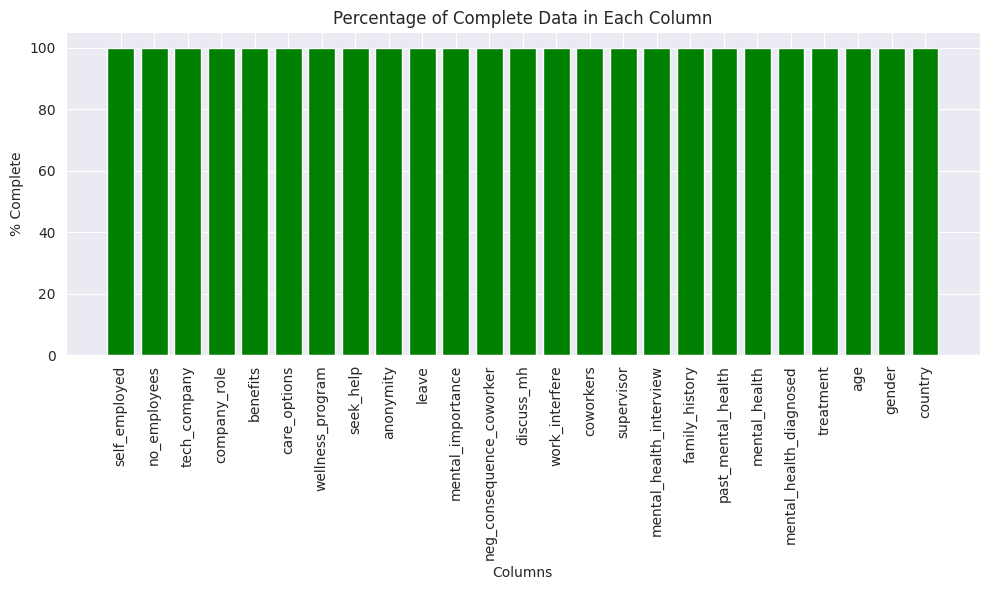

In [275]:
# Create a list of colors based on the percentage of complete data
colors = ['green' if pct == 100 else 'orange' for pct in data_complete["% Complete"]]

# Create a bar plot to visualize the percentage of complete data
plt.figure(figsize=(10, 6))
plt.bar(data_complete.index, data_complete["% Complete"], color=colors)
plt.xlabel("Columns")
plt.ylabel("% Complete")
plt.title("Percentage of Complete Data in Each Column")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [276]:
# Convert all columns to int data type

columns_to_convert = [col for col in data.columns if col != 'mental_health_diagnosed']
data[columns_to_convert] = data[columns_to_convert].astype('int64')

data = data.dropna()
mode_imputed = data
mode_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             2189 non-null   int64  
 1   no_employees              2189 non-null   int64  
 2   tech_company              2189 non-null   int64  
 3   company_role              2189 non-null   int64  
 4   benefits                  2189 non-null   int64  
 5   care_options              2189 non-null   int64  
 6   wellness_program          2189 non-null   int64  
 7   seek_help                 2189 non-null   int64  
 8   anonymity                 2189 non-null   int64  
 9   leave                     2189 non-null   int64  
 10  mental_importance         2189 non-null   int64  
 11  neg_consequence_coworker  2189 non-null   int64  
 12  discuss_mh                2189 non-null   int64  
 13  work_interfere            2189 non-null   int64  
 14  coworker

#### **Multiple Imputation**

In [277]:
data = pd.read_csv("Clean Mental Health.csv")

In [278]:
# Initialize the MICE imputer
mice_imputer = IterativeImputer()

# Exclude the 'mental_health_diagnosed' column from imputation
columns_to_impute = [col for col in data.columns if col != 'mental_health_diagnosed']

# Perform MICE imputation on the selected columns
data[columns_to_impute] = mice_imputer.fit_transform(data[columns_to_impute])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             3269 non-null   float64
 1   no_employees              3269 non-null   float64
 2   tech_company              3269 non-null   float64
 3   company_role              3269 non-null   float64
 4   benefits                  3269 non-null   float64
 5   care_options              3269 non-null   float64
 6   wellness_program          3269 non-null   float64
 7   seek_help                 3269 non-null   float64
 8   anonymity                 3269 non-null   float64
 9   leave                     3269 non-null   float64
 10  mental_importance         3269 non-null   float64
 11  neg_consequence_coworker  3269 non-null   float64
 12  discuss_mh                3269 non-null   float64
 13  work_interfere            3269 non-null   float64
 14  coworker

In [279]:
columns_to_convert = [col for col in data.columns if col != 'mental_health_diagnosed']
data[columns_to_convert] = data[columns_to_convert].astype('int64')

data = data.dropna()
mice_imputed = data
mice_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             2189 non-null   int64  
 1   no_employees              2189 non-null   int64  
 2   tech_company              2189 non-null   int64  
 3   company_role              2189 non-null   int64  
 4   benefits                  2189 non-null   int64  
 5   care_options              2189 non-null   int64  
 6   wellness_program          2189 non-null   int64  
 7   seek_help                 2189 non-null   int64  
 8   anonymity                 2189 non-null   int64  
 9   leave                     2189 non-null   int64  
 10  mental_importance         2189 non-null   int64  
 11  neg_consequence_coworker  2189 non-null   int64  
 12  discuss_mh                2189 non-null   int64  
 13  work_interfere            2189 non-null   int64  
 14  coworker

#### **Hot Deck Imputation**

In [280]:
data = pd.read_csv("Clean Mental Health.csv")

In [281]:
columns_to_impute = data.columns[data.columns != "mental_health_diagnosed"]
imputed_data = data.copy()

# Iterate through columns to impute missing values with mode
for column in columns_to_impute:
  vars_to_impute = [column]

  for var in vars_to_impute:
      # Create a donor pool consisting of cases without missing values for the current variable
      donor_pool = imputed_data.dropna(subset=[var])

      # Iterate over each case with a missing value for the current variable
      for index, row in imputed_data[imputed_data[var].isnull()].iterrows():
          # Check if there are any donor cases available
          if not donor_pool.empty:
              # Find the closest donor case based on a chosen similarity measure
              similarity_scores = np.abs(donor_pool[vars_to_impute] - row[vars_to_impute])
              closest_donor = donor_pool.iloc[similarity_scores.sum(axis=1).idxmin()]

              # Impute the missing value with the value from the closest donor case
              imputed_data.at[index, var] = closest_donor[var]
          else:
              # Handle the case where there are no donor cases available
              # You can choose to skip imputation or use another imputation method
              imputed_data.at[index, var] = np.nan  # or any other imputation approach

data = imputed_data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             3269 non-null   int64  
 1   no_employees              3269 non-null   float64
 2   tech_company              3269 non-null   float64
 3   company_role              3269 non-null   float64
 4   benefits                  3269 non-null   float64
 5   care_options              3269 non-null   float64
 6   wellness_program          3269 non-null   float64
 7   seek_help                 3269 non-null   float64
 8   anonymity                 3269 non-null   float64
 9   leave                     3269 non-null   float64
 10  mental_importance         3269 non-null   float64
 11  neg_consequence_coworker  3269 non-null   float64
 12  discuss_mh                3269 non-null   float64
 13  work_interfere            3269 non-null   float64
 14  coworker

In [282]:
columns_to_convert = [col for col in data.columns if col != 'mental_health_diagnosed']
data[columns_to_convert] = data[columns_to_convert].astype('int64')

data = data.dropna()
hotdeck_imputed = data
hotdeck_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             2189 non-null   int64  
 1   no_employees              2189 non-null   int64  
 2   tech_company              2189 non-null   int64  
 3   company_role              2189 non-null   int64  
 4   benefits                  2189 non-null   int64  
 5   care_options              2189 non-null   int64  
 6   wellness_program          2189 non-null   int64  
 7   seek_help                 2189 non-null   int64  
 8   anonymity                 2189 non-null   int64  
 9   leave                     2189 non-null   int64  
 10  mental_importance         2189 non-null   int64  
 11  neg_consequence_coworker  2189 non-null   int64  
 12  discuss_mh                2189 non-null   int64  
 13  work_interfere            2189 non-null   int64  
 14  coworker

#### **K-NN Imputation**

In [283]:
data = pd.read_csv("Clean Mental Health.csv")

In [284]:
target_column = 'mental_health_diagnosed'
y = data[target_column]

# Remove the target column from the DataFrame for imputation
X = data.drop(columns=[target_column])

# Perform KNN imputation
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
X_imputed = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Combine the imputed data with the target column
data_imputed = pd.concat([X_imputed_df, y], axis=1)

data = data_imputed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             3269 non-null   float64
 1   no_employees              3269 non-null   float64
 2   tech_company              3269 non-null   float64
 3   company_role              3269 non-null   float64
 4   benefits                  3269 non-null   float64
 5   care_options              3269 non-null   float64
 6   wellness_program          3269 non-null   float64
 7   seek_help                 3269 non-null   float64
 8   anonymity                 3269 non-null   float64
 9   leave                     3269 non-null   float64
 10  mental_importance         3269 non-null   float64
 11  neg_consequence_coworker  3269 non-null   float64
 12  discuss_mh                3269 non-null   float64
 13  work_interfere            3269 non-null   float64
 14  coworker

In [285]:
columns_to_convert = [col for col in data.columns if col != 'mental_health_diagnosed']
data[columns_to_convert] = data[columns_to_convert].astype('int64')

data = data.dropna()
knn_imputed = data
knn_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   self_employed             2189 non-null   int64  
 1   no_employees              2189 non-null   int64  
 2   tech_company              2189 non-null   int64  
 3   company_role              2189 non-null   int64  
 4   benefits                  2189 non-null   int64  
 5   care_options              2189 non-null   int64  
 6   wellness_program          2189 non-null   int64  
 7   seek_help                 2189 non-null   int64  
 8   anonymity                 2189 non-null   int64  
 9   leave                     2189 non-null   int64  
 10  mental_importance         2189 non-null   int64  
 11  neg_consequence_coworker  2189 non-null   int64  
 12  discuss_mh                2189 non-null   int64  
 13  work_interfere            2189 non-null   int64  
 14  coworker

### **Model Construction**

#### **Define the Classifiers**

In [286]:
# Initialize classifiers
classifiers = {
    'LR': LogisticRegression(),
    'RF': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB(),
}

#### **Mode Imputation Model Results**

In [287]:
X = mode_imputed.drop(["mental_health_diagnosed"], axis=1)
y = mode_imputed['mental_health_diagnosed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [288]:
# Dictionary to store evaluation metrics
results = {}
modeCls = {}

# Loop through each classifier
for name, clf in classifiers.items():

  # Train the classifier
  clf.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = clf.predict(X_test)

  modeCls[name] = clf

  # Calculate evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  confusion = confusion_matrix(y_test, y_pred)

  # Store the results in the dictionary
  results[name] = {
      "Accuracy": accuracy,
      "Precision": precision,
      "Recall": recall,
      "F1 Score": f1,
      "ROC AUC": roc_auc,
      "Confusion Matrix": confusion,
  }

# Display the results
print(f"=== MODE IMPUTATION ===")
print()
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}".format(metrics["Accuracy"]))
    print("Precision: {:.2f}".format(metrics["Precision"]))
    print("Recall: {:.2f}".format(metrics["Recall"]))
    print("F1 Score: {:.2f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.2f}".format(metrics["ROC AUC"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

=== MODE IMPUTATION ===

--- LR ---
Accuracy: 0.89
Precision: 0.89
Recall: 0.96
F1 Score: 0.92
ROC AUC: 0.86
Confusion Matrix:
[[112  36]
 [ 11 279]]


--- RF ---
Accuracy: 0.91
Precision: 0.91
Recall: 0.95
F1 Score: 0.93
ROC AUC: 0.88
Confusion Matrix:
[[121  27]
 [ 14 276]]


--- SVM ---
Accuracy: 0.66
Precision: 0.66
Recall: 1.00
F1 Score: 0.80
ROC AUC: 0.50
Confusion Matrix:
[[  0 148]
 [  0 290]]


--- KNN ---
Accuracy: 0.73
Precision: 0.74
Recall: 0.93
F1 Score: 0.82
ROC AUC: 0.64
Confusion Matrix:
[[ 51  97]
 [ 20 270]]


--- NB ---
Accuracy: 0.89
Precision: 0.93
Recall: 0.90
F1 Score: 0.91
ROC AUC: 0.88
Confusion Matrix:
[[128  20]
 [ 30 260]]




#### **MICE Imputation Results**

In [289]:
X = mice_imputed.drop(["mental_health_diagnosed"], axis=1)
y = mice_imputed['mental_health_diagnosed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [290]:
# Dictionary to store evaluation metrics
results = {}
miceCls = {}

# Loop through each classifier
for name, clf in classifiers.items():

  # Train the classifier
  clf.fit(X_train, y_train)

  miceCls[name] = clf

  # Make predictions on the test set
  y_pred = clf.predict(X_test)

  # Calculate evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  confusion = confusion_matrix(y_test, y_pred)

  # Store the results in the dictionary
  results[name] = {
      "Accuracy": accuracy,
      "Precision": precision,
      "Recall": recall,
      "F1 Score": f1,
      "ROC AUC": roc_auc,
      "Confusion Matrix": confusion,
  }

# Display the results
print(f"=== MICE IMPUTATION ===")
print()
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}".format(metrics["Accuracy"]))
    print("Precision: {:.2f}".format(metrics["Precision"]))
    print("Recall: {:.2f}".format(metrics["Recall"]))
    print("F1 Score: {:.2f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.2f}".format(metrics["ROC AUC"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

=== MICE IMPUTATION ===

--- LR ---
Accuracy: 0.89
Precision: 0.89
Recall: 0.96
F1 Score: 0.92
ROC AUC: 0.86
Confusion Matrix:
[[112  36]
 [ 12 278]]


--- RF ---
Accuracy: 0.91
Precision: 0.91
Recall: 0.96
F1 Score: 0.94
ROC AUC: 0.89
Confusion Matrix:
[[121  27]
 [ 11 279]]


--- SVM ---
Accuracy: 0.66
Precision: 0.66
Recall: 1.00
F1 Score: 0.80
ROC AUC: 0.50
Confusion Matrix:
[[  0 148]
 [  0 290]]


--- KNN ---
Accuracy: 0.72
Precision: 0.73
Recall: 0.92
F1 Score: 0.82
ROC AUC: 0.63
Confusion Matrix:
[[ 50  98]
 [ 23 267]]


--- NB ---
Accuracy: 0.89
Precision: 0.92
Recall: 0.91
F1 Score: 0.91
ROC AUC: 0.88
Confusion Matrix:
[[125  23]
 [ 27 263]]




#### **Hot Deck Imputation Results**

In [291]:
X = hotdeck_imputed.drop(["mental_health_diagnosed"], axis=1)
y = hotdeck_imputed['mental_health_diagnosed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [292]:
# Dictionary to store evaluation metrics
results = {}
hdeckCls = {}

# Loop through each classifier
for name, clf in classifiers.items():

  # Train the classifier
  clf.fit(X_train, y_train)

  hdeckCls[name] = clf

  # Make predictions on the test set
  y_pred = clf.predict(X_test)

  # Calculate evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  confusion = confusion_matrix(y_test, y_pred)

  # Store the results in the dictionary
  results[name] = {
      "Accuracy": accuracy,
      "Precision": precision,
      "Recall": recall,
      "F1 Score": f1,
      "ROC AUC": roc_auc,
      "Confusion Matrix": confusion,
  }

# Display the results
print(f"=== HOT DECK IMPUTATION ===")
print()
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}".format(metrics["Accuracy"]))
    print("Precision: {:.2f}".format(metrics["Precision"]))
    print("Recall: {:.2f}".format(metrics["Recall"]))
    print("F1 Score: {:.2f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.2f}".format(metrics["ROC AUC"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

=== HOT DECK IMPUTATION ===

--- LR ---
Accuracy: 0.89
Precision: 0.88
Recall: 0.96
F1 Score: 0.92
ROC AUC: 0.86
Confusion Matrix:
[[111  37]
 [ 11 279]]


--- RF ---
Accuracy: 0.92
Precision: 0.92
Recall: 0.96
F1 Score: 0.94
ROC AUC: 0.90
Confusion Matrix:
[[123  25]
 [ 11 279]]


--- SVM ---
Accuracy: 0.66
Precision: 0.66
Recall: 1.00
F1 Score: 0.80
ROC AUC: 0.50
Confusion Matrix:
[[  0 148]
 [  0 290]]


--- KNN ---
Accuracy: 0.76
Precision: 0.75
Recall: 0.94
F1 Score: 0.84
ROC AUC: 0.67
Confusion Matrix:
[[ 59  89]
 [ 17 273]]


--- NB ---
Accuracy: 0.86
Precision: 0.95
Recall: 0.83
F1 Score: 0.88
ROC AUC: 0.87
Confusion Matrix:
[[134  14]
 [ 49 241]]




#### **KNN Imputation Results**

In [293]:
X = knn_imputed.drop(["mental_health_diagnosed"], axis=1)
y = knn_imputed['mental_health_diagnosed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [294]:
# Dictionary to store evaluation metrics
results = {}
knnCls = {}

# Loop through each classifier
for name, clf in classifiers.items():

  # Train the classifier
  clf.fit(X_train, y_train)

  knnCls[name] = clf

  # Make predictions on the test set
  y_pred = clf.predict(X_test)

  # Calculate evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  confusion = confusion_matrix(y_test, y_pred)

  # Store the results in the dictionary
  results[name] = {
      "Accuracy": accuracy,
      "Precision": precision,
      "Recall": recall,
      "F1 Score": f1,
      "ROC AUC": roc_auc,
      "Confusion Matrix": confusion,
  }

# Display the results
print(f"=== KNN IMPUTATION ===")
print()
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}".format(metrics["Accuracy"]))
    print("Precision: {:.2f}".format(metrics["Precision"]))
    print("Recall: {:.2f}".format(metrics["Recall"]))
    print("F1 Score: {:.2f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.2f}".format(metrics["ROC AUC"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

=== KNN IMPUTATION ===

--- LR ---
Accuracy: 0.89
Precision: 0.88
Recall: 0.96
F1 Score: 0.92
ROC AUC: 0.85
Confusion Matrix:
[[111  37]
 [ 12 278]]


--- RF ---
Accuracy: 0.92
Precision: 0.92
Recall: 0.97
F1 Score: 0.94
ROC AUC: 0.89
Confusion Matrix:
[[122  26]
 [ 10 280]]


--- SVM ---
Accuracy: 0.66
Precision: 0.66
Recall: 1.00
F1 Score: 0.80
ROC AUC: 0.50
Confusion Matrix:
[[  0 148]
 [  0 290]]


--- KNN ---
Accuracy: 0.72
Precision: 0.72
Recall: 0.94
F1 Score: 0.82
ROC AUC: 0.62
Confusion Matrix:
[[ 43 105]
 [ 16 274]]


--- NB ---
Accuracy: 0.89
Precision: 0.93
Recall: 0.90
F1 Score: 0.92
ROC AUC: 0.88
Confusion Matrix:
[[128  20]
 [ 28 262]]




### **Cross Validation**

#### **Mode Imputation CV results**

In [295]:
X = mode_imputed.drop(["mental_health_diagnosed"], axis=1)
y = mode_imputed['mental_health_diagnosed']

# Set the number of folds for cross-validation
num_folds = 5

# Create a cross-validation object (KFold)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [296]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')

    # Calculate the mean and standard deviation of the cross-validation scores
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)

    results[name] = {
        "MeanCVAccuracy": mean_cv_score,
        "StdCVAccuracy": std_cv_score
    }

print(f"=== MODE IMPUTATION ===")
print()
# Display the results
for name, metrics in results.items():
  print(f"--- {name} ---")
  print("Mean Cross-Validation Accuracy:", round(metrics["MeanCVAccuracy"], 2))
  print("Standard Deviation of Cross-Validation Accuracy:", round(metrics["StdCVAccuracy"], 2))
  print("\n")

=== MODE IMPUTATION ===

--- LR ---
Mean Cross-Validation Accuracy: 0.89
Standard Deviation of Cross-Validation Accuracy: 0.01


--- RF ---
Mean Cross-Validation Accuracy: 0.92
Standard Deviation of Cross-Validation Accuracy: 0.01


--- SVM ---
Mean Cross-Validation Accuracy: 0.66
Standard Deviation of Cross-Validation Accuracy: 0.01


--- KNN ---
Mean Cross-Validation Accuracy: 0.74
Standard Deviation of Cross-Validation Accuracy: 0.02


--- NB ---
Mean Cross-Validation Accuracy: 0.88
Standard Deviation of Cross-Validation Accuracy: 0.01




#### **MICE Imputation CV Results**

In [297]:
X = mice_imputed.drop(["mental_health_diagnosed"], axis=1)
y = mice_imputed['mental_health_diagnosed']

# Set the number of folds for cross-validation
num_folds = 5

# Create a cross-validation object (KFold)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [298]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')

    # Calculate the mean and standard deviation of the cross-validation scores
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)

    results[name] = {
        "MeanCVAccuracy": mean_cv_score,
        "StdCVAccuracy": std_cv_score
    }

print(f"=== MICE IMPUTATION ===")
print()
# Display the results
for name, metrics in results.items():
  print(f"--- {name} ---")
  print("Mean Cross-Validation Accuracy:", round(metrics["MeanCVAccuracy"], 2))
  print("Standard Deviation of Cross-Validation Accuracy:", round(metrics["StdCVAccuracy"], 2))
  print("\n")

=== MICE IMPUTATION ===

--- LR ---
Mean Cross-Validation Accuracy: 0.89
Standard Deviation of Cross-Validation Accuracy: 0.01


--- RF ---
Mean Cross-Validation Accuracy: 0.92
Standard Deviation of Cross-Validation Accuracy: 0.01


--- SVM ---
Mean Cross-Validation Accuracy: 0.66
Standard Deviation of Cross-Validation Accuracy: 0.01


--- KNN ---
Mean Cross-Validation Accuracy: 0.74
Standard Deviation of Cross-Validation Accuracy: 0.01


--- NB ---
Mean Cross-Validation Accuracy: 0.89
Standard Deviation of Cross-Validation Accuracy: 0.02




#### **Hot Deck Imputation CV Results**

In [299]:
X = hotdeck_imputed.drop(["mental_health_diagnosed"], axis=1)
y = hotdeck_imputed['mental_health_diagnosed']

# Set the number of folds for cross-validation
num_folds = 5

# Create a cross-validation object (KFold)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [300]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')

    # Calculate the mean and standard deviation of the cross-validation scores
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)

    results[name] = {
        "MeanCVAccuracy": mean_cv_score,
        "StdCVAccuracy": std_cv_score
    }

print(f"=== HOT DECK IMPUTATION ===")
print()
# Display the results
for name, metrics in results.items():
  print(f"--- {name} ---")
  print("Mean Cross-Validation Accuracy:", round(metrics["MeanCVAccuracy"], 2))
  print("Standard Deviation of Cross-Validation Accuracy:", round(metrics["StdCVAccuracy"], 2))
  print("\n")

=== HOT DECK IMPUTATION ===

--- LR ---
Mean Cross-Validation Accuracy: 0.89
Standard Deviation of Cross-Validation Accuracy: 0.01


--- RF ---
Mean Cross-Validation Accuracy: 0.92
Standard Deviation of Cross-Validation Accuracy: 0.01


--- SVM ---
Mean Cross-Validation Accuracy: 0.66
Standard Deviation of Cross-Validation Accuracy: 0.01


--- KNN ---
Mean Cross-Validation Accuracy: 0.74
Standard Deviation of Cross-Validation Accuracy: 0.02


--- NB ---
Mean Cross-Validation Accuracy: 0.86
Standard Deviation of Cross-Validation Accuracy: 0.02




#### **KNN Imputation CV Results**

In [301]:
X = knn_imputed.drop(["mental_health_diagnosed"], axis=1)
y = knn_imputed['mental_health_diagnosed']

# Set the number of folds for cross-validation
num_folds = 5

# Create a cross-validation object (KFold)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [302]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')

    # Calculate the mean and standard deviation of the cross-validation scores
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)

    results[name] = {
        "MeanCVAccuracy": mean_cv_score,
        "StdCVAccuracy": std_cv_score
    }

print(f"=== HOT DECK IMPUTATION ===")
print()
# Display the results
for name, metrics in results.items():
  print(f"--- {name} ---")
  print("Mean Cross-Validation Accuracy:", round(metrics["MeanCVAccuracy"], 2))
  print("Standard Deviation of Cross-Validation Accuracy:", round(metrics["StdCVAccuracy"], 2))
  print("\n")

=== HOT DECK IMPUTATION ===

--- LR ---
Mean Cross-Validation Accuracy: 0.89
Standard Deviation of Cross-Validation Accuracy: 0.01


--- RF ---
Mean Cross-Validation Accuracy: 0.91
Standard Deviation of Cross-Validation Accuracy: 0.01


--- SVM ---
Mean Cross-Validation Accuracy: 0.66
Standard Deviation of Cross-Validation Accuracy: 0.01


--- KNN ---
Mean Cross-Validation Accuracy: 0.73
Standard Deviation of Cross-Validation Accuracy: 0.02


--- NB ---
Mean Cross-Validation Accuracy: 0.89
Standard Deviation of Cross-Validation Accuracy: 0.02




### **Ensemble Methods Using the Best Imputation**

#### **Bagging Ensemble Methods**

In [303]:
# Create a list of base classifiers
base_classifiers = [knnCls["LR"], knnCls["RF"]]

# Create a list of bagging classifiers, each using a different base classifier
bagging_classifiers = []
n_estimators = 2  # Number of base estimators

for classifier in base_classifiers:
    bagging_model = BaggingClassifier(estimator=classifier, n_estimators=n_estimators)
    bagging_classifiers.append(bagging_model)

# Train the ensemble
for bagging_model in bagging_classifiers:
    bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("ROC AUC: {:.2f}".format(roc_auc))
print("Confusion Matrix:")
print(confusion)
print("\n")

Accuracy: 0.91
Precision: 0.91
Recall: 0.96
F1 Score: 0.93
ROC AUC: 0.89
Confusion Matrix:
[[121  27]
 [ 12 278]]




#### **Boosting Ensemble Method**

In [304]:
# Create a list of base classifiers
base_classifiers = [knnCls["LR"], knnCls["RF"]]

# Create a list of boosting classifiers, each using a different base classifier
boosting_classifiers = []
n_estimators = 3  # Number of boosting iterations

for classifier in base_classifiers:
    boosting_model = AdaBoostClassifier(estimator=classifier, n_estimators=n_estimators)
    boosting_classifiers.append(boosting_model)

# Train the ensemble
boosting_model.fit(X_train, y_train)

# Make predictions on the test set using the new model
y_pred = boosting_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("ROC AUC: {:.2f}".format(roc_auc))
print("Confusion Matrix:")
print(confusion)
print("\n")

Accuracy: 0.92
Precision: 0.92
Recall: 0.96
F1 Score: 0.94
ROC AUC: 0.90
Confusion Matrix:
[[123  25]
 [ 11 279]]




#### **Stacking Ensemble Method**

In [305]:
estimators = [
    ('RF', knnCls["RF"]),
    ('KNN', knnCls["KNN"]),
    ('NB', knnCls["NB"]),
    ('LR', knnCls["LR"]),
    ('SVM', knnCls["SVM"])
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator= knnCls["LR"])

# Train the ensemble
stacking_model.fit(X_train, y_train)

# Make predictions on the test set using the new model
y_pred = stacking_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("ROC AUC: {:.2f}".format(roc_auc))
print("Confusion Matrix:")
print(confusion)
print("\n")


Accuracy: 0.92
Precision: 0.92
Recall: 0.97
F1 Score: 0.94
ROC AUC: 0.90
Confusion Matrix:
[[124  24]
 [ 10 280]]


